## <font size=5> <strong>Heart Disease Prediction By Farouk Adejumo
 

## I. Importing essential libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.ipynb_checkpoints', 'catboost_info', 'Heart_disease_prediction.ipynb', 'Sample_Submission[1].csv', 'Test_Dataset[1].csv', 'Train_Dataset[1].csv']


## II. Importing and understanding the dataset 

In [2]:
dataset = pd.read_csv("Train_Dataset[1].csv")

#### Verifying it as a 'dataframe' object in pandas

In [3]:
type(dataset)

pandas.core.frame.DataFrame

#### Dimension of the  dataset

In [4]:
print('Number of Rows: {}'.format( dataset.shape[0]))
print('Number of Cols: {}'.format( dataset.shape[1]))

Number of Rows: 7303
Number of Cols: 15


#### Printing out some columns in the dataset

In [5]:
dataset.head()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1
1,11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0
2,13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1
3,19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1
4,11293,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1


In [6]:
dataset.sample(5)

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1692,19369,30,1,1,185,410,1,2,83,0,4.2,1,0,0,0
6717,16692,59,0,3,185,446,1,2,175,1,1.0,1,2,2,1
6831,19697,64,0,0,187,202,1,1,179,0,3.8,1,4,3,1
3255,16839,40,0,1,120,230,1,0,181,0,1.9,0,4,3,1
4193,18975,68,0,0,173,549,0,1,157,1,1.7,2,3,1,1


In [7]:
dataset.tail()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
7298,19401,30,1,2,107,177,1,2,119,0,2.7,1,0,0,0
7299,10446,42,1,2,96,551,1,2,76,0,1.9,2,3,2,1
7300,13219,51,1,0,151,165,1,0,190,1,0.9,0,0,2,1
7301,15349,29,0,0,195,287,1,2,161,1,3.4,1,1,0,1
7302,15363,38,0,0,193,487,0,1,154,1,4.8,1,4,3,1


#### Column names converted to lower case

In [8]:
dataset.columns = dataset.columns.str.lower()

## Descriptive Statistics on the data set

In [10]:
# Drop the 'id' column
dataset = dataset.drop(columns=['id'])

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7303 entries, 0 to 7302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       7303 non-null   int64  
 1   sex       7303 non-null   int64  
 2   cp        7303 non-null   int64  
 3   trestbps  7303 non-null   int64  
 4   chol      7303 non-null   int64  
 5   fbs       7303 non-null   int64  
 6   restecg   7303 non-null   int64  
 7   thalach   7303 non-null   int64  
 8   exang     7303 non-null   int64  
 9   oldpeak   7303 non-null   float64
 10  slope     7303 non-null   int64  
 11  ca        7303 non-null   int64  
 12  thal      7303 non-null   int64  
 13  target    7303 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 798.9 KB


In [12]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000
mean,53.172669,0.499658,1.502533,147.447487,342.805970,0.493085,1.013008,136.506093,0.503218,3.129851,0.991510,2.019033,1.502259,0.813501
std,14.185970,0.500034,1.115594,31.099538,127.291998,0.499986,0.815806,38.141966,0.500024,1.791160,0.817291,1.410546,1.113137,0.389535
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.000000,0.000000,1.000000,120.000000,231.000000,0.000000,0.000000,104.000000,0.000000,1.600000,0.000000,1.000000,1.000000,1.000000
50%,53.000000,0.000000,1.000000,148.000000,341.000000,0.000000,1.000000,137.000000,1.000000,3.100000,1.000000,2.000000,1.000000,1.000000
75%,65.000000,1.000000,3.000000,174.000000,450.000000,1.000000,2.000000,170.000000,1.000000,4.700000,2.000000,3.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Let's understand our columns better:

In [13]:
info = ["age","1, 0","chest pain type, (values 0,1,2,3)","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 0 = normal; 1 = fixed defect; 2 = reversable defect"]




for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1, 0
cp:			chest pain type, (values 0,1,2,3)
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 0 = normal; 1 = fixed defect; 2 = reversable defect


#### Analysing the 'target' variable

In [14]:
dataset["target"].describe()

count    7303.000000
mean        0.813501
std         0.389535
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: target, dtype: float64

In [15]:
dataset["target"].unique()

array([1, 0], dtype=int64)

#### Clearly, this is a classification problem, with the target variable having values '0' and '1'

### Checking correlation between columns

In [16]:
# Calculate the correlation matrix
correlation_matrix = dataset.corr()

# Display the correlation with the target variable
target_corr = correlation_matrix['target'].abs().sort_values(ascending=False)
print(target_corr)

target      1.000000
exang       0.481897
cp          0.198082
sex         0.030608
chol        0.012291
trestbps    0.009320
ca          0.008244
restecg     0.005911
thal        0.005709
oldpeak     0.004899
thalach     0.004634
fbs         0.003925
age         0.002846
slope       0.001909
Name: target, dtype: float64


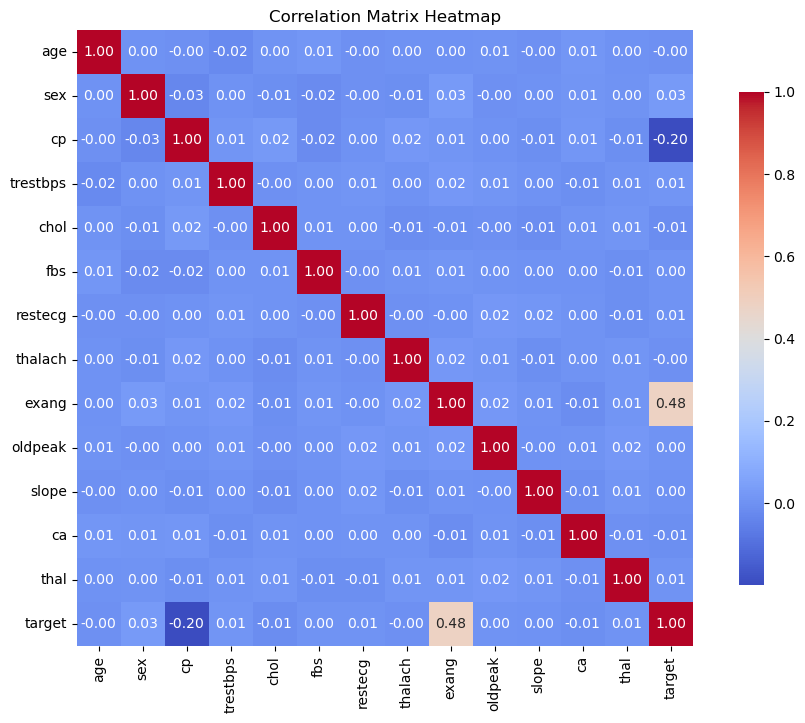

In [17]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix Heatmap')
plt.show()

##  Exploratory Data Analysis (EDA)

### First, analysing the target variable:

Target class distribution:
target
1    5941
0    1362
Name: count, dtype: int64


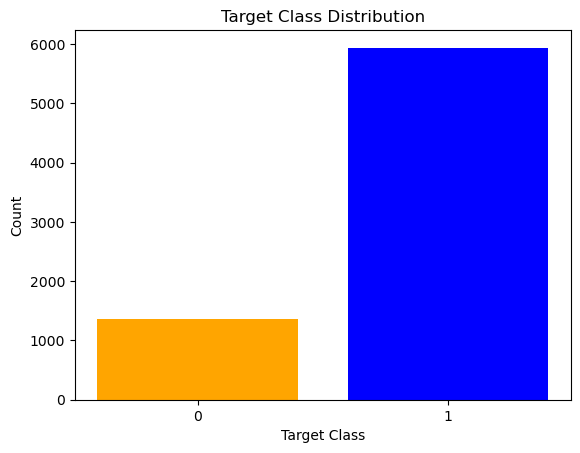

Class 1: 5941 (81.35%)
Class 0: 1362 (18.65%)
Is the dataset balanced? False


In [18]:
# Count occurrences of each class in the target column
target_counts = dataset['target'].value_counts()

# Print the counts
print("Target class distribution:")
print(target_counts)

# Visualize the distribution
plt.bar(target_counts.index, target_counts.values, color=['blue', 'orange'])
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.title('Target Class Distribution')
plt.xticks(target_counts.index)
plt.show()

# Check if the dataset is balanced
total = target_counts.sum()
for class_value, count in target_counts.items():
    proportion = count / total
    print(f'Class {class_value}: {count} ({proportion:.2%})')

is_balanced = all(abs(count - total/len(target_counts)) < 0.1 * (total/len(target_counts)) for count in target_counts)
print("Is the dataset balanced?", is_balanced)


### Exploring the Categorical Variables

In [19]:
# Defining the categorical columns based on domain knowledge
categorical_cols = ['sex','cp', 'restecg', 'slope', 'thal', 'sex', 'exang', 'fbs']

# Counting the unique values in each categorical column
for col in categorical_cols:
    unique_values_count = dataset[col].value_counts()
    print(f"Counts of unique values in '{col}':\n{unique_values_count}\n")


Counts of unique values in 'sex':
sex
0    3654
1    3649
Name: count, dtype: int64

Counts of unique values in 'cp':
cp
1    1858
3    1829
2    1814
0    1802
Name: count, dtype: int64

Counts of unique values in 'restecg':
restecg
2    2478
1    2442
0    2383
Name: count, dtype: int64

Counts of unique values in 'slope':
slope
0    2470
1    2425
2    2408
Name: count, dtype: int64

Counts of unique values in 'thal':
thal
1    1879
3    1822
2    1813
0    1789
Name: count, dtype: int64

Counts of unique values in 'sex':
sex
0    3654
1    3649
Name: count, dtype: int64

Counts of unique values in 'exang':
exang
1    3675
0    3628
Name: count, dtype: int64

Counts of unique values in 'fbs':
fbs
0    3702
1    3601
Name: count, dtype: int64



### We'll analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features

### Analysing the 'Sex' feature

In [20]:
dataset["sex"].unique()

array([0, 1], dtype=int64)

##### We notice, that as expected, the 'sex' feature has 2 unique features

<Axes: xlabel='sex', ylabel='target'>

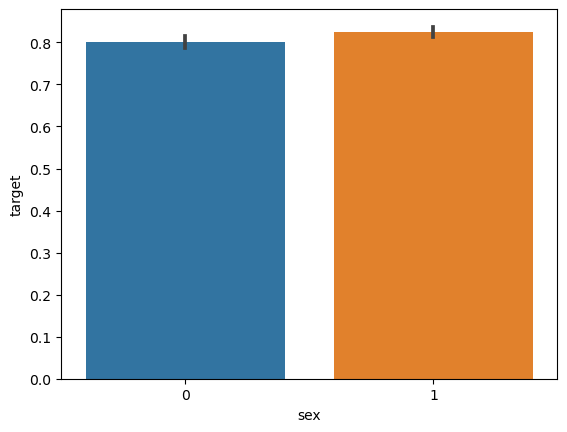

In [21]:
sns.barplot(x=dataset["sex"],y=dataset["target"])

##### I notice, that both genders are likely to have heart problems from the dataset

### Analysing the 'Chest Pain Type' feature

In [22]:
dataset["cp"].unique()

array([1, 2, 0, 3], dtype=int64)

In [23]:
sorted(dataset["cp"].unique())

[0, 1, 2, 3]

##### As expected, the CP feature has values from 0 to 3

<Axes: xlabel='cp', ylabel='target'>

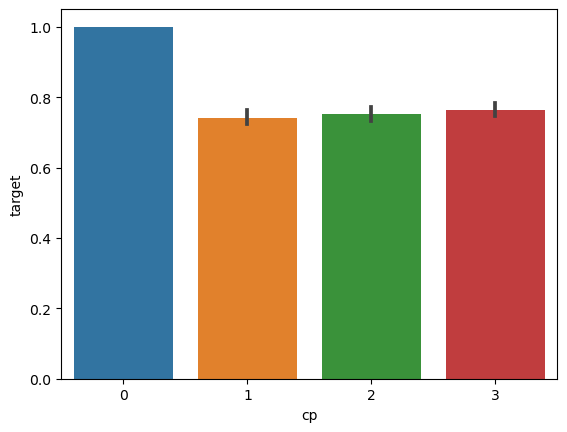

In [24]:
sns.barplot(x=dataset["cp"],y=dataset["target"])

##### I notice, that chest pain of '0', i.e. the ones with typical angina are more likely to have heart problems

### Analysing the FBS feature

In [25]:
dataset["fbs"].describe()

count    7303.000000
mean        0.493085
std         0.499986
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: fbs, dtype: float64

In [26]:
dataset["fbs"].unique()

array([1, 0], dtype=int64)

<Axes: xlabel='fbs', ylabel='target'>

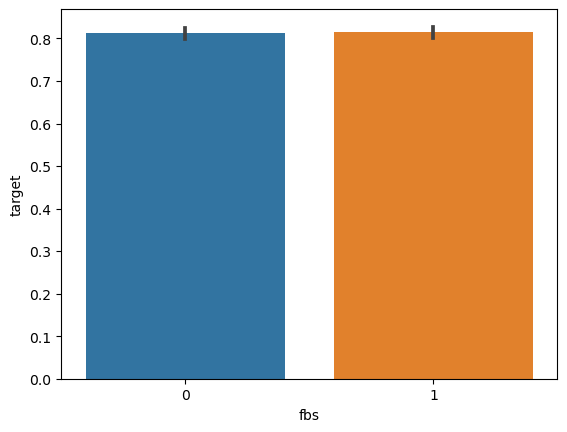

In [27]:
sns.barplot(x=dataset["fbs"],y=dataset["target"])

##### they are both likely to have the diseases

### Analysing the restecg feature

In [28]:
dataset["restecg"].unique()

array([0, 1, 2], dtype=int64)

<Axes: xlabel='restecg', ylabel='target'>

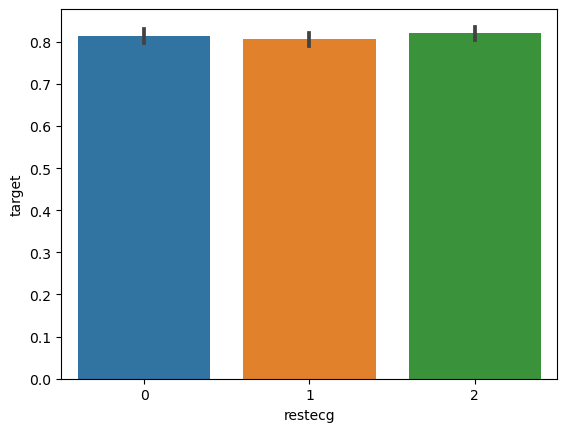

In [29]:
sns.barplot(x=dataset["restecg"],y=dataset["target"])

##### They are all likely to have a heart disease 

### Analysing the 'exang' feature

In [30]:
dataset["exang"].unique()

array([0, 1], dtype=int64)

<Axes: xlabel='exang', ylabel='target'>

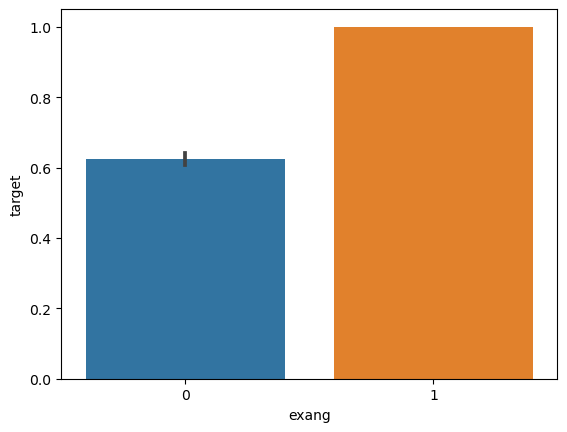

In [31]:
sns.barplot(x=dataset["exang"],y=dataset["target"])

##### People with exang=0 i.e. Exercise induced angina are much less likely to have heart problems 

### Analysing the Slope feature

In [32]:
dataset["slope"].unique()

array([1, 2, 0], dtype=int64)

<Axes: xlabel='slope', ylabel='target'>

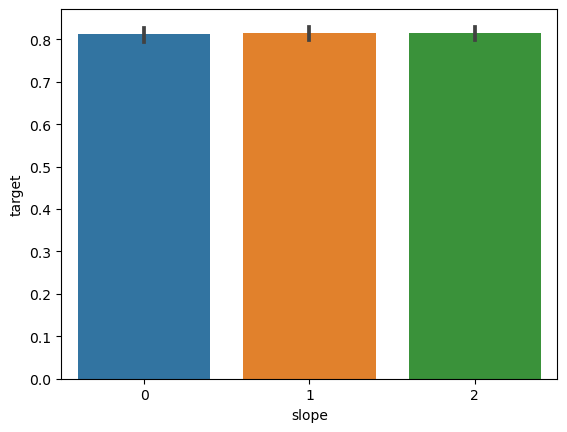

In [33]:
sns.barplot(x=dataset["slope"],y=dataset["target"])

##### We observe, that all have the same proporton

### Analysing the 'ca' feature

In [34]:
dataset["ca"].unique()

array([4, 1, 3, 2, 0], dtype=int64)

<Axes: xlabel='ca', ylabel='count'>

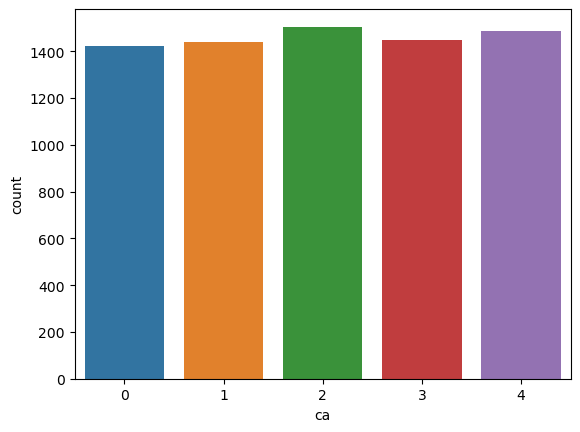

In [35]:
sns.countplot(x=dataset["ca"])

<Axes: xlabel='ca', ylabel='target'>

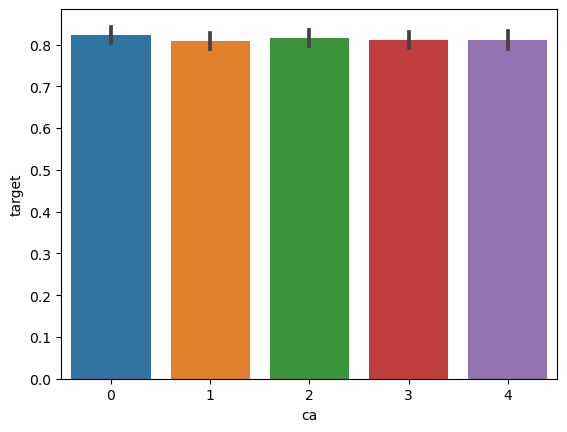

In [36]:
sns.barplot(x=dataset["ca"],y=dataset["target"])

##### ca has astonishingly large number of heart patients

### Analysing the 'thal' feature

In [37]:
dataset["thal"].unique()

array([1, 0, 2, 3], dtype=int64)

<Axes: xlabel='thal', ylabel='target'>

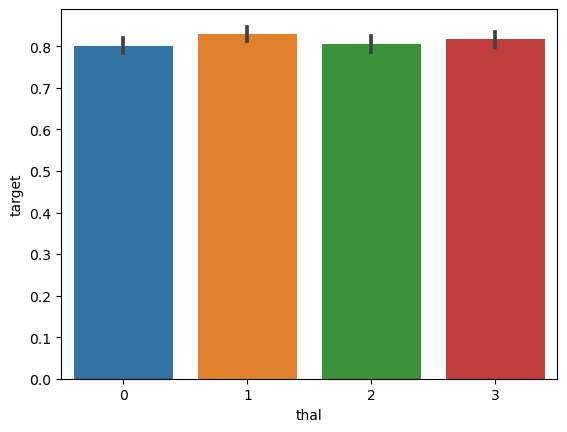

In [38]:
sns.barplot(x=dataset["thal"],y=dataset["target"])

### Checking for Outliers in The Dataset

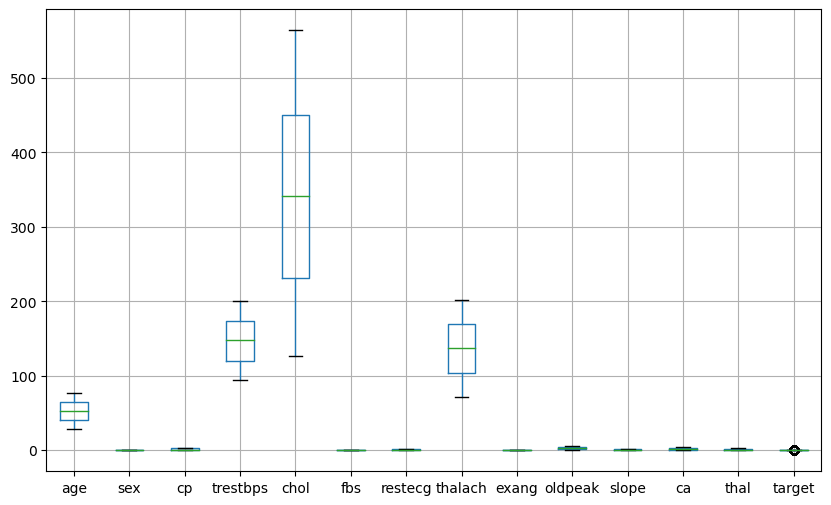

In [39]:
numerical_data = dataset.select_dtypes(include='number')

# Create a boxplot for all numerical columns
plt.figure(figsize=(10, 6))  # Adjust the size of the plot if needed
numerical_data.boxplot()

# Show the plot
plt.show()

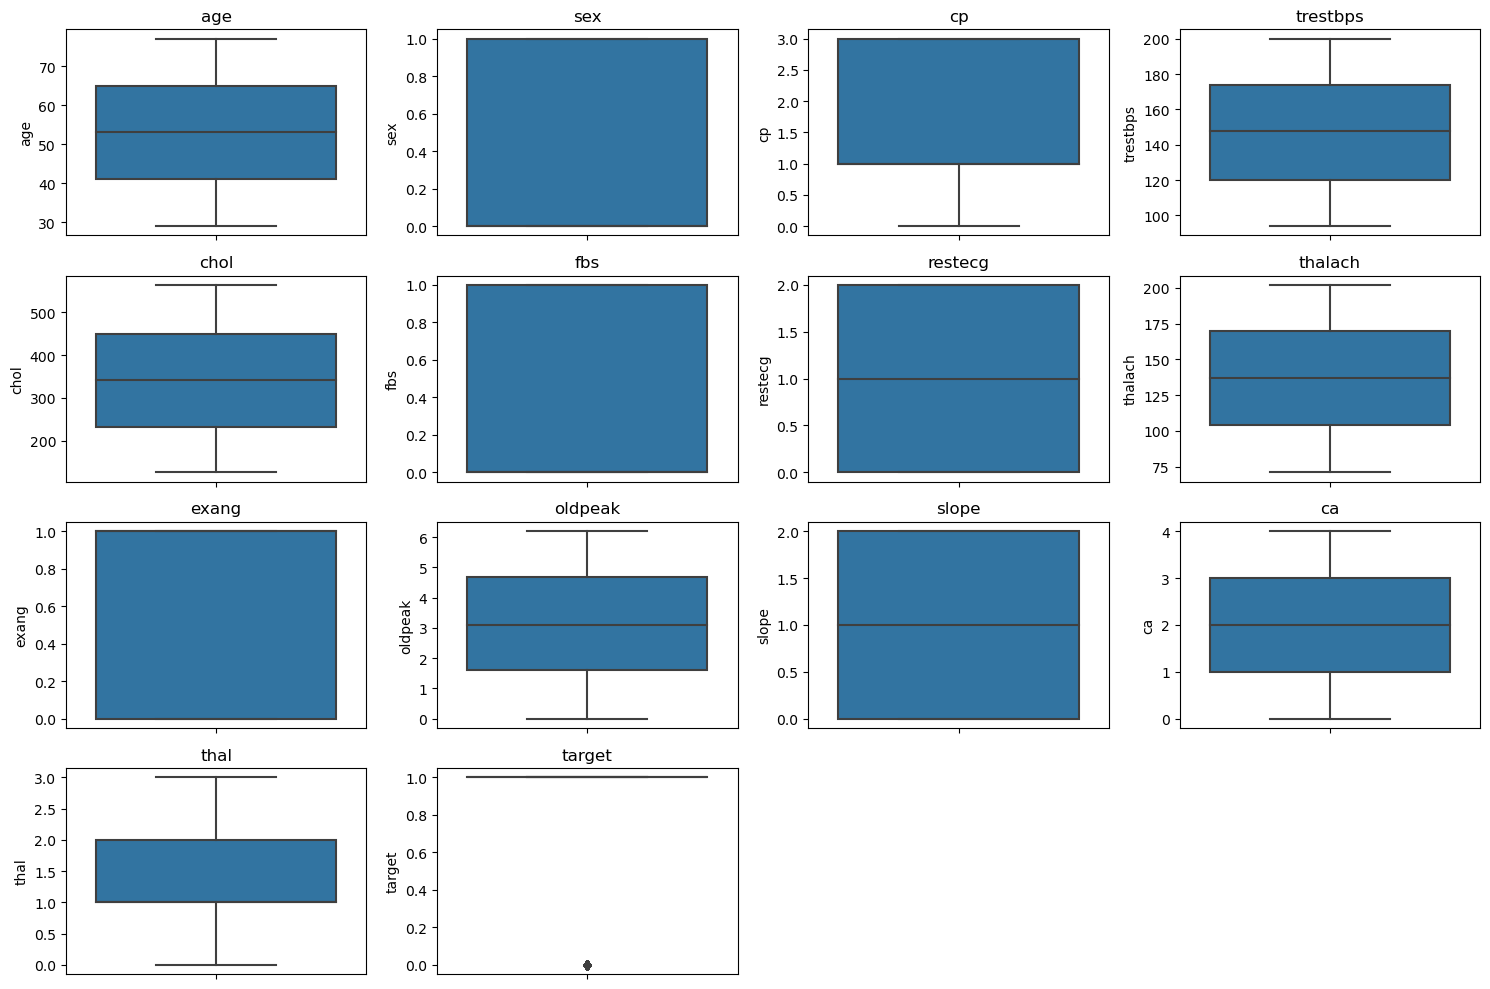

In [40]:
numeric_columns = dataset.select_dtypes(include=['float64', 'int64']).columns

# Plot boxplots for each numeric feature
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=dataset[column])
    plt.title(column)

plt.tight_layout()
plt.show()

### Checking if the Continious variables follow a normal distribution

### We'll check for 'age', 'trestbps', 'chol', 'thalach', and 'oldpeak'.

In [41]:
import seaborn as sns
from scipy import stats

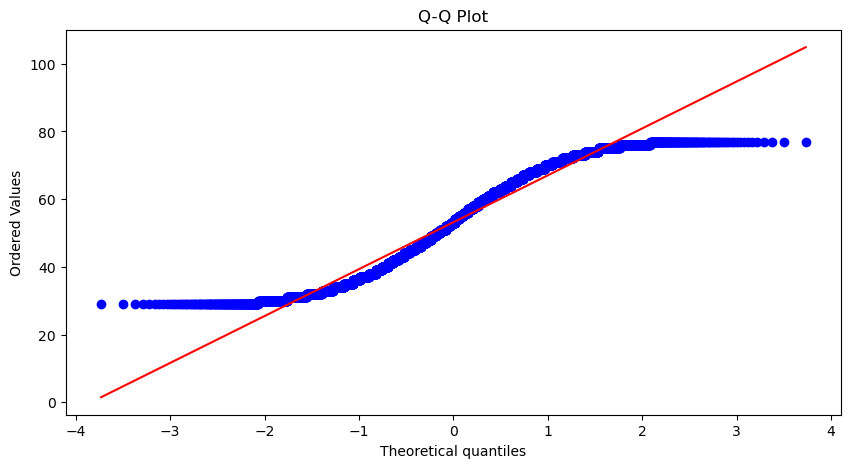

Shapiro-Wilk Test Statistic: 0.9520581960678101
p-value: 1.2051166793193427e-43
The data is not normally distributed (reject H0)


In [42]:
# Q-Q Plot
plt.figure(figsize=(10, 5))
stats.probplot(dataset['age'], dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

# Shapiro-Wilk Test
shapiro_test = stats.shapiro(dataset['age'])
print("Shapiro-Wilk Test Statistic:", shapiro_test.statistic)
print("p-value:", shapiro_test.pvalue)

# Interpret the result
alpha = 0.05
if shapiro_test.pvalue > alpha:
    print("The data is normally distributed (fail to reject H0)")
else:
    print("The data is not normally distributed (reject H0)")

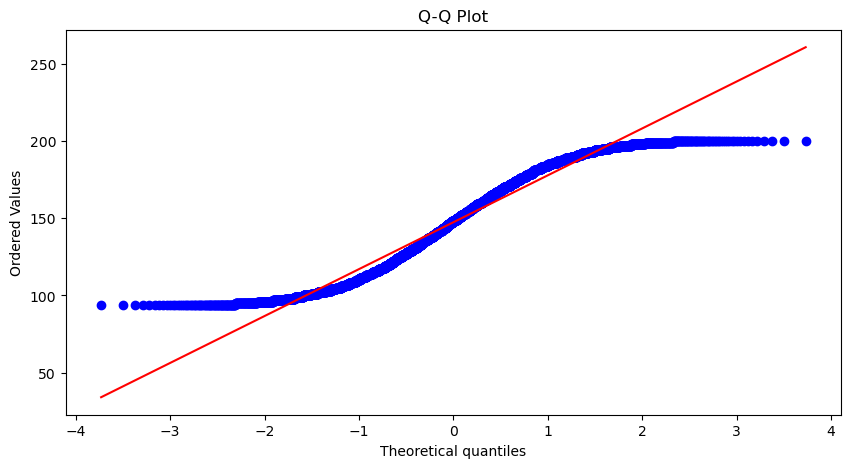

Shapiro-Wilk Test Statistic: 0.953301191329956
p-value: 3.1669345293740866e-43
The data is not normally distributed (reject H0)


In [43]:
# Q-Q Plot
plt.figure(figsize=(10, 5))
stats.probplot(dataset[ 'trestbps'], dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

# Shapiro-Wilk Test
shapiro_test = stats.shapiro(dataset[ 'trestbps'])
print("Shapiro-Wilk Test Statistic:", shapiro_test.statistic)
print("p-value:", shapiro_test.pvalue)

# Interpret the result
alpha = 0.05
if shapiro_test.pvalue > alpha:
    print("The data is normally distributed (fail to reject H0)")
else:
    print("The data is not normally distributed (reject H0)")

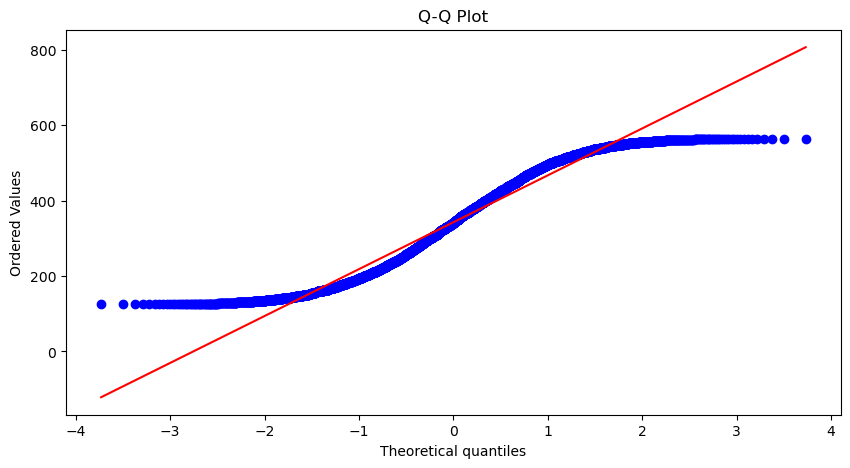

Shapiro-Wilk Test Statistic: 0.9544121623039246
p-value: 7.623063645927005e-43
The data is not normally distributed (reject H0)


In [44]:
# Q-Q Plot
plt.figure(figsize=(10, 5))
stats.probplot(dataset['chol'], dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

# Shapiro-Wilk Test
shapiro_test = stats.shapiro(dataset['chol'])
print("Shapiro-Wilk Test Statistic:", shapiro_test.statistic)
print("p-value:", shapiro_test.pvalue)

# Interpret the result
alpha = 0.05
if shapiro_test.pvalue > alpha:
    print("The data is normally distributed (fail to reject H0)")
else:
    print("The data is not normally distributed (reject H0)")

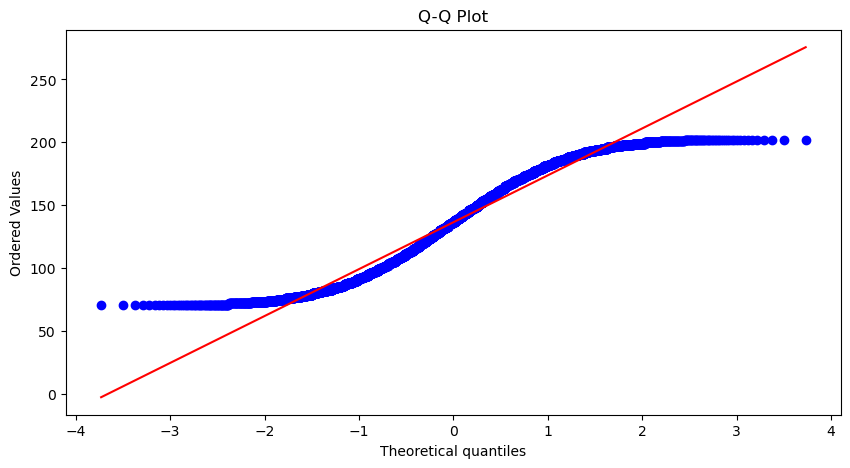

Shapiro-Wilk Test Statistic: 0.9542683362960815
p-value: 6.796297551975363e-43
The data is not normally distributed (reject H0)


In [45]:
# Q-Q Plot
plt.figure(figsize=(10, 5))
stats.probplot(dataset['thalach'], dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

# Shapiro-Wilk Test
shapiro_test = stats.shapiro(dataset['thalach'])
print("Shapiro-Wilk Test Statistic:", shapiro_test.statistic)
print("p-value:", shapiro_test.pvalue)

# Interpret the result
alpha = 0.05
if shapiro_test.pvalue > alpha:
    print("The data is normally distributed (fail to reject H0)")
else:
    print("The data is not normally distributed (reject H0)")

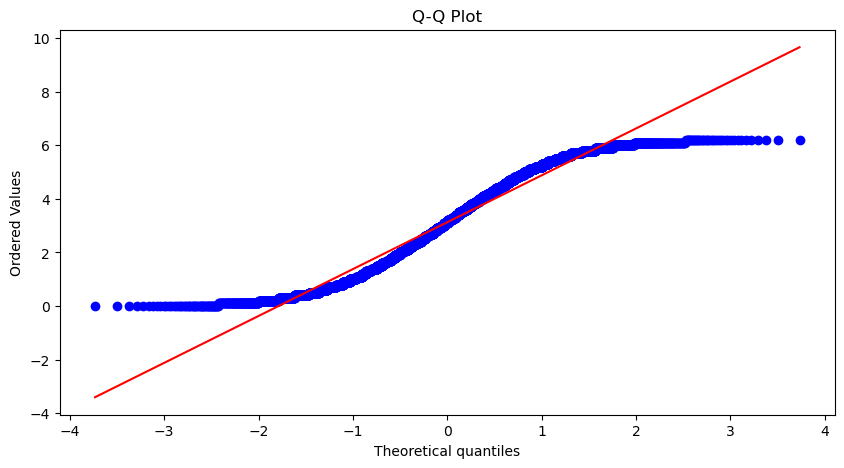

Shapiro-Wilk Test Statistic: 0.9543066620826721
p-value: 7.006492321624085e-43
The data is not normally distributed (reject H0)


In [46]:
# Q-Q Plot
plt.figure(figsize=(10, 5))
stats.probplot(dataset['oldpeak'], dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

# Shapiro-Wilk Test
shapiro_test = stats.shapiro(dataset['oldpeak'])
print("Shapiro-Wilk Test Statistic:", shapiro_test.statistic)
print("p-value:", shapiro_test.pvalue)

# Interpret the result
alpha = 0.05
if shapiro_test.pvalue > alpha:
    print("The data is normally distributed (fail to reject H0)")
else:
    print("The data is not normally distributed (reject H0)")

## FEATURE ENGINEERING

In [47]:
# Feature interactions
dataset['age_trestbps_interaction'] = dataset['age'] * dataset['trestbps']
dataset['chol_thalach_interaction'] = dataset['chol'] * dataset['thalach']
dataset['age_oldpeak_interaction'] = dataset['age'] * dataset['oldpeak']

# Log transformations to normalize skewed data
dataset['log_chol'] = np.log1p(dataset['chol'])
dataset['log_trestbps'] = np.log1p(dataset['trestbps'])
dataset['log_oldpeak'] = np.log1p(dataset['oldpeak'])

#### Enconding

In [48]:
# One-hot encoding for categorical features
dataset = pd.get_dummies(dataset, columns=['cp', 'restecg', 'slope', 'thal'], drop_first=True)

## Spliting into Train and Test

In [49]:
# Split the dataset into features (X) and target (y)
X = dataset.drop('target', axis=1)  # Assuming 'target' is the label
y = dataset['target']

## Addressing the Imbalanced dataset using SMOTE

In [50]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
# Address Imbalance with SMOTE (Oversampling the minority class)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

## Rescaling

In [51]:
from sklearn.preprocessing import StandardScaler
# Scale Continuous Features (for Gradient Boosting and XGBoost)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
X_train.shape

(8317, 25)

In [53]:
X_test.shape

(3565, 25)

In [54]:
y_train.shape

(8317,)

In [55]:
y_test.shape

(3565,)

## Machine Learning Modeling / Model Fitting

In [56]:
import pandas as pd

from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier, 
                              ExtraTreesClassifier, StackingClassifier, VotingClassifier)
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


# Random Forest Classifier
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_rf))

# Extra Trees Classifier (an extension of Random Forest)
et = ExtraTreesClassifier(class_weight='balanced', random_state=42)
et.fit(X_train, y_train)
y_pred_et = et.predict(X_test)
print("Extra Trees Results:")
print(classification_report(y_test, y_pred_et))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred_et))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_et))

# Decision Tree Classifier
dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Results:")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred_dt))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_dt))

# Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_scaled, y_train)
y_pred_gb = gb.predict(X_test_scaled)
print("Gradient Boosting Results:")
print(classification_report(y_test, y_pred_gb))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred_gb))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_gb))

# XGBoost Classifier
xgb = XGBClassifier(scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]), random_state=42)
xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)
print("XGBoost Results:")
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred_xgb))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_xgb))

# LightGBM Classifier
lgbm = LGBMClassifier(scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]), random_state=42)
lgbm.fit(X_train_scaled, y_train)
y_pred_lgbm = lgbm.predict(X_test_scaled)
print("LightGBM Results:")
print(classification_report(y_test, y_pred_lgbm))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred_lgbm))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_lgbm))

# CatBoost Classifier (no scaling required)
catboost = CatBoostClassifier(verbose=0, random_state=42)
catboost.fit(X_train, y_train)
y_pred_catboost = catboost.predict(X_test)
print("CatBoost Results:")
print(classification_report(y_test, y_pred_catboost))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred_catboost))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_catboost))

# Logistic Regression
lr = LogisticRegression(class_weight='balanced', random_state=42)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred_lr))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_lr))

# K-Nearest Neighbors Classifier (KNN)
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
print("K-Nearest Neighbors Results:")
print(classification_report(y_test, y_pred_knn))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred_knn))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_knn))

# Support Vector Machine Classifier (SVM)
svm = SVC(kernel='linear', probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
print("Support Vector Machine Results:")
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred_svm))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_svm))

# Naive Bayes Classifier (GaussianNB)
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
y_pred_nb = nb.predict(X_test_scaled)
print("Naive Bayes Results:")
print(classification_report(y_test, y_pred_nb))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred_nb))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_nb))

# Ensemble Method: Stacking Classifier (combines multiple models)
estimators = [
    ('rf', RandomForestClassifier(class_weight='balanced', random_state=42)),
    ('xgb', XGBClassifier(scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]), random_state=42)),
    ('lgbm', LGBMClassifier(scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]), random_state=42))
]
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking_clf.fit(X_train_scaled, y_train)
y_pred_stacking = stacking_clf.predict(X_test_scaled)
print("Stacking Classifier Results:")
print(classification_report(y_test, y_pred_stacking))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred_stacking))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_stacking))

# Voting Classifier (soft voting based on probabilities from multiple models)
voting_clf = VotingClassifier(estimators=estimators, voting='soft')
voting_clf.fit(X_train_scaled, y_train)
y_pred_voting = voting_clf.predict(X_test_scaled)
print("Voting Classifier Results:")
print(classification_report(y_test, y_pred_voting))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred_voting))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_voting))

Random Forest Results:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1755
           1       0.95      0.84      0.89      1810

    accuracy                           0.89      3565
   macro avg       0.90      0.90      0.89      3565
weighted avg       0.90      0.89      0.89      3565

Confusion Matrix: [[1667   88]
 [ 289 1521]]
ROC-AUC Score: 0.8950945207851285
Extra Trees Results:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      1755
           1       0.94      0.84      0.89      1810

    accuracy                           0.89      3565
   macro avg       0.89      0.89      0.89      3565
weighted avg       0.90      0.89      0.89      3565

Confusion Matrix: [[1653  102]
 [ 286 1524]]
ROC-AUC Score: 0.8919346460782925
Decision Tree Results:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1755
           1

Stacking Classifier Results:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      1755
           1       0.92      0.86      0.89      1810

    accuracy                           0.89      3565
   macro avg       0.89      0.89      0.89      3565
weighted avg       0.89      0.89      0.89      3565

Confusion Matrix: [[1610  145]
 [ 245 1565]]
ROC-AUC Score: 0.891009900678409
[LightGBM] [Info] Number of positive: 4131, number of negative: 4186
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000984 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2369
[LightGBM] [Info] Number of data points in the train set: 8317, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496694 -> initscore=-0.013226
[LightGBM] [Info] Start training from score -0.013226
Voting Classifier Results:
              precision    recall  f1-score   su

In [57]:
from sklearn.metrics import accuracy_score, make_scorer, f1_score, precision_score, recall_score, classification_report

In [58]:
def ml_scores(model_name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    rou_auc = roc_auc_score(y_true, y_pred)
    
    return pd.DataFrame({'Accuracy': np.round(accuracy, 3), 
                         'Precision': np.round(precision, 3), 
                         'Recall': np.round(recall, 3),
                         'F1': np.round(f1, 3), 
                          'ROC-AUC': np.round(rou_auc, 3)}, index=[model_name])

In [59]:
rf_result = ml_scores("Random Forest", y_test, y_pred_rf)
rf_result

,Accuracy,Precision,Recall,F1,ROC-AUC
Random Forest,0.894,0.945,0.84,0.89,0.895


In [60]:
et_result = ml_scores("ExtraTrees", y_test, y_pred_et)
et_result

,Accuracy,Precision,Recall,F1,ROC-AUC
ExtraTrees,0.891,0.937,0.842,0.887,0.892


In [61]:
dt_result = ml_scores("DecisionTree", y_test, y_pred_dt)
dt_result

,Accuracy,Precision,Recall,F1,ROC-AUC
DecisionTree,0.881,0.891,0.872,0.881,0.881


In [62]:
gb_result = ml_scores("GradientBoosting", y_test, y_pred_gb)
gb_result

,Accuracy,Precision,Recall,F1,ROC-AUC
GradientBoosting,0.881,0.963,0.796,0.871,0.882


In [63]:
xgb_result = ml_scores("XGBoost", y_test, y_pred_xgb)
xgb_result

,Accuracy,Precision,Recall,F1,ROC-AUC
XGBoost,0.891,0.915,0.867,0.89,0.892


In [64]:
lgbm_result = ml_scores("LightGBM ", y_test, y_pred_lgbm)
lgbm_result

,Accuracy,Precision,Recall,F1,ROC-AUC
LightGBM,0.882,0.922,0.838,0.878,0.882


In [65]:
catboost_result = ml_scores("CatBoost", y_test, y_pred_catboost)
catboost_result

,Accuracy,Precision,Recall,F1,ROC-AUC
CatBoost,0.886,0.933,0.835,0.881,0.886


In [66]:
lr_result = ml_scores("Logistic Regression", y_test, y_pred_lr)
lr_result

,Accuracy,Precision,Recall,F1,ROC-AUC
Logistic Regression,0.881,0.936,0.821,0.875,0.882


In [67]:
knn_result = ml_scores("K-Nearest Neighbors", y_test, y_pred_knn)
knn_result

,Accuracy,Precision,Recall,F1,ROC-AUC
K-Nearest Neighbors,0.885,0.929,0.838,0.881,0.886


In [68]:
svm_result = ml_scores("Support Vector Machine", y_test, y_pred_svm)
svm_result

,Accuracy,Precision,Recall,F1,ROC-AUC
Support Vector Machine,0.879,1.0,0.761,0.864,0.88


In [69]:
nb_result = ml_scores("Naive Bayes", y_test, y_pred_nb)
nb_result

,Accuracy,Precision,Recall,F1,ROC-AUC
Naive Bayes,0.795,1.0,0.596,0.747,0.798


In [70]:
stacking_result = ml_scores("Stacking Classifier", y_test, y_pred_stacking)
stacking_result

,Accuracy,Precision,Recall,F1,ROC-AUC
Stacking Classifier,0.891,0.915,0.865,0.889,0.891


In [71]:
voting_result = ml_scores("Voting Classifier", y_test, y_pred_voting)
voting_result

,Accuracy,Precision,Recall,F1,ROC-AUC
Voting Classifier,0.888,0.925,0.848,0.884,0.888


###  Compare Model's Performance

In [72]:
modeling_performance = pd.concat([rf_result,et_result,dt_result,gb_result,xgb_result,lgbm_result,catboost_result,lr_result,knn_result, svm_result, nb_result, stacking_result, voting_result])
modeling_performance.sort_values(by="Recall", ascending=True)

,Accuracy,Precision,Recall,F1,ROC-AUC
Naive Bayes,0.795,1.000,0.596,0.747,0.798
Support Vector Machine,0.879,1.000,0.761,0.864,0.880
GradientBoosting,0.881,0.963,0.796,0.871,0.882
Logistic Regression,0.881,0.936,0.821,0.875,0.882
CatBoost,0.886,0.933,0.835,0.881,0.886
LightGBM,0.882,0.922,0.838,0.878,0.882
K-Nearest Neighbors,0.885,0.929,0.838,0.881,0.886
Random Forest,0.894,0.945,0.840,0.890,0.895
ExtraTrees,0.891,0.937,0.842,0.887,0.892
Voting Classifier,0.888,0.925,0.848,0.884,0.888


In [73]:
score_rf = round(accuracy_score(y_pred_rf,y_test)*100,2)
score_et = round(accuracy_score(y_pred_et,y_test)*100,2)
score_dt = round(accuracy_score(y_pred_dt,y_test)*100,2)
score_gb = round(accuracy_score(y_pred_gb,y_test)*100,2)
score_xgb = round(accuracy_score(y_pred_xgb,y_test)*100,2)
score_lgbm = round(accuracy_score(y_pred_lgbm,y_test)*100,2)
score_catboost = round(accuracy_score(y_pred_catboost,y_test)*100,2)
score_lr = round(accuracy_score(y_pred_lr,y_test)*100,2)
score_knn = round(accuracy_score(y_pred_knn,y_test)*100,2)
score_svm = round(accuracy_score(y_pred_svm,y_test)*100,2)
score_nb = round(accuracy_score(y_pred_nb,y_test)*100,2)
score_stacking = round(accuracy_score(y_pred_stacking,y_test)*100,2)
score_voting = round(accuracy_score(y_pred_voting,y_test)*100,2)

In [74]:
scores = [score_rf,score_lr,score_nb,score_svm,score_knn,score_dt,score_gb,score_xgb,score_stacking,score_voting,score_catboost,score_et,score_lgbm]
algorithms = ["Random Forest","Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Gradient Boosting",
             "XGBoost","CatBoost","Stacking Classifier","Voting Classifier","Extra Trees","LightGBM"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Random Forest is: 89.42 %
The accuracy score achieved using Logistic Regression is: 88.08 %
The accuracy score achieved using Naive Bayes is: 79.47 %
The accuracy score achieved using Support Vector Machine is: 87.85 %
The accuracy score achieved using K-Nearest Neighbors is: 88.53 %
The accuracy score achieved using Decision Tree is: 88.08 %
The accuracy score achieved using Gradient Boosting is: 88.08 %
The accuracy score achieved using XGBoost is: 89.14 %
The accuracy score achieved using CatBoost is: 89.06 %
The accuracy score achieved using Stacking Classifier is: 88.75 %
The accuracy score achieved using Voting Classifier is: 88.56 %
The accuracy score achieved using Extra Trees is: 89.12 %
The accuracy score achieved using LightGBM is: 88.16 %


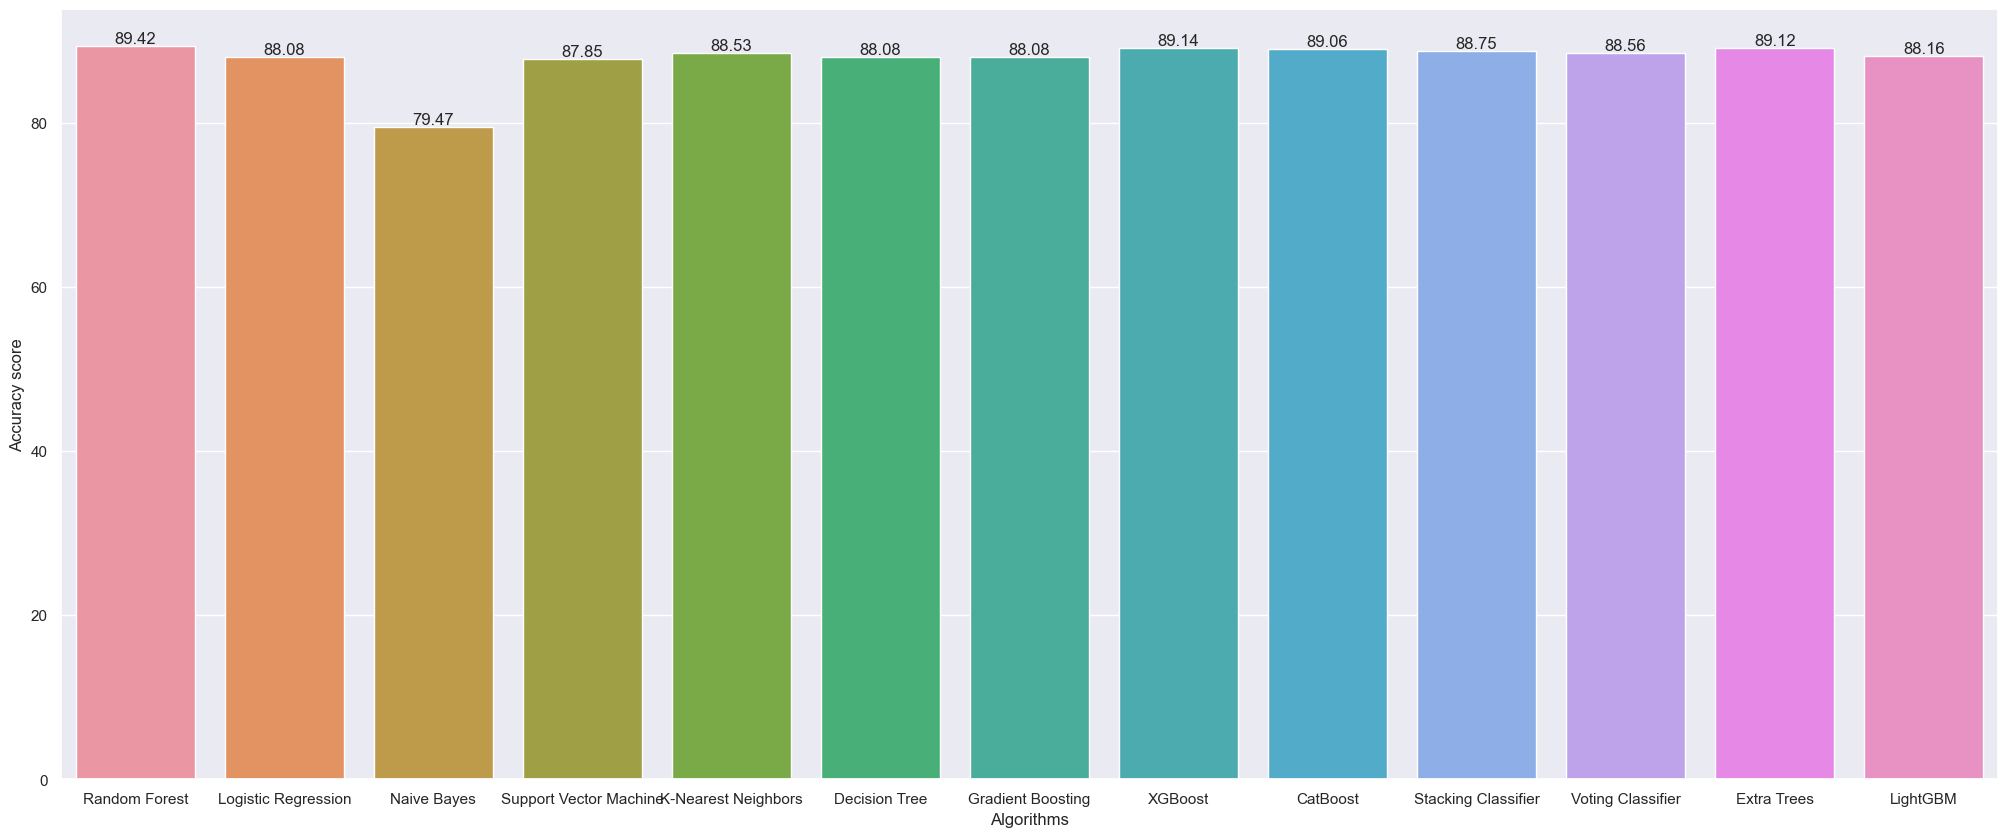

In [75]:
sns.set(rc={'figure.figsize':(25,10)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

ax = sns.barplot(x=algorithms,y=scores)
# Add the scores on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',  # Display the height of the bar
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position
                ha='center', va='bottom', fontsize=12)  # Centered horizontally, above the bar


### Random Forest with 89.4% has a better accuracy as compare to other algorithms <br> <br>

In [77]:
test_data = pd.read_csv('Test_Dataset[1].csv')

In [78]:
# Feature Engineering for test data
test_data['age_trestbps_interaction'] = test_data['age'] * test_data['trestbps']
test_data['chol_thalach_interaction'] = test_data['chol'] * test_data['thalach']
test_data['age_oldpeak_interaction'] = test_data['age'] * test_data['oldpeak']

# Log transformations to normalize skewed data
test_data ['log_chol'] = np.log1p(test_data ['chol'])
test_data ['log_trestbps'] = np.log1p(test_data ['trestbps'])
test_data ['log_oldpeak'] = np.log1p(test_data ['oldpeak'])

# One-hot encoding for categorical features
test_data  = pd.get_dummies(test_data , columns=['cp', 'restecg', 'slope', 'thal'], drop_first=True)


# Align test data with training data (X_train) to avoid missing columns or extra columns
X_test = test_data.drop(columns=['id'])  # Drop the 'id' column if it's not used for prediction
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)


# Scaling the training data (fit and transform)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit scaler on training data and transform it

# Now you can scale the test data
X_test_scaled = scaler.transform(X_test)  # Use the already fitted scaler to transform the test data


# Use the trained model to predict the target based on the scaled test data
y_pred_test =  rf.predict(X_test_scaled)

# Add predictions to the test data for easier comparison and analysis
test_data['Predicted_Target_new'] = y_pred_test

# Display the first few rows of the test data with the predicted target
print(test_data[['id', 'Predicted_Target_new']].head())

      id  Predicted_Target_new
0  16501                     1
1  10444                     1
2  14288                     1
3  10409                     1
4  17330                     1


In [82]:
submissions= pd.read_csv('Sample_Submission[1].csv')

In [83]:
# Add the predictions to the submissions DataFrame
submissions['target'] = test_data['Predicted_Target_new']

# Save the DataFrame to a new CSV file
submissions.to_csv('submission1.csv', index=False)